# Итерационные методы

Во многих прикладных задачах мы сталкиваемя с решением линейных систем или анализом матриц, размер которых настолько велик, что матрицу невозможно разместить целиком в памяти, или матрица в памяти еще размещается, но время работы рассмотренных ранее алгоритмов для LU, QR, SVD, разложения Шура и других выходит за разумные рамки. На практике пройденные ранне алгоритмы для работы с заполненными матрицами хорошо работают для матриц с числом строк и столбцов порядка $10^3-10^4$, для матриц большего размера нужны новые подходы. К счастью, довольно часто мы имеем дело с *разреженными* матрицами, т.е. матрицами, имеющими большое число нулевых элементов. Например, разреженные матрицы возникают при дискретизации дифференциальных операторов. Для хранения разреженной матрицы используют специальные форматы, которые сохраняют значение матричного элемента вместе с его положением, а нулевые элементы вообще не храняться, что может значительно (на порядки) снизить требуемый для хранения объем памяти. Проблема в том, что ранее изученные алгоритмы не сохраняют структуру разреженной матрицы и в процессе их выполнения матрица становится заполненной, тем самым теряются всякие преимущества работы с разреженной матрицой. 

В ряде случаев хранить матрицу вообще не требуется, так как известен алгоритм (обычно весьма простой), как умножить матрицу на вектор, в котором информация о матрице хранится неявно. Например, конечные разности легко вычисляются алгоритмически, записывать коэффициенты соответствующей матрицы нет необходимости. Разреженную матрицу также можно быстро умножить на вектор, так что разреженные матрицы также можно отнести к рассматриваемому случаю. Если кроме умножения матрицы на вектор мы ничего с матрицей делать не можем, то единственным возможным действием будет последовательное умножение матрицы на вектора, возникающие на ранних шагах алгоритма, тем самым естественным образом возникают *итерации* и итерационные алгоритмы. 

Ранее изучаемые нами алгоритмы позволяли получать в точной арифметике точные значения для решения системы, собственных векторов и чисел, определителей и т.п. Итерационные методы вообще говоря предназначены для получения приближенного ответа, хотя в ряде случаев и могут дать точное решение (например, метод сопряженного градиента). Если точное решение не требуется, то итерационные методы часто применяются и для решения задач небольшой размерности, для которой возможно применение и неитерационных методов, для уменьшения времени расчета.

Итерационных методах координатное представление матрицы не важно, так как методы строят вспомогательный базис,
в котором удобнее проводить расчеты.
Поэтому далее мы будем просто писать $A$ для обозначения линейного оператора, не заботясь о какой-либо записи матрицы этого оператора.
Будем обозначать $Ax$ действие оператора $A$ на произвольный вектор $x$, другими словами $Ax$ есть произведение матрица $A$ и вектора $x$.
В ряде методов требуется вычисление $A^Tx$, но вычисление транспонированной матрицы $A^T$ для алгоритмически заданной матрицы $A$
обычно не получается провести автоматически, поэтому при необходимости, мы будем считать заданной функцию для вычисления произведения $A^Tx$
для произвольного вектора $x$.

Для проведения тестов мы будем использовать трехмерный [оператор Лапласса](https://ru.wikipedia.org/wiki/Оператор_Лапласа) 
$$
\Delta=\frac{\partial^2}{\partial x^2}+\frac{\partial^2}{\partial y^2}+\frac{\partial^2}{\partial z^2}
$$
в дискретизации [центральными конечными разностями](https://ru.wikipedia.org/wiki/Конечные_разности) на сетке $(x_i,y_j,z_k)=(ih,jh,kh)$:
$$Ax_{i,j,k}=h^{-2}(x_{i+1,j,k}+x_{i-1,j,k}+x_{i,j+1,k}+x_{i,j-1,k}+x_{i,j,k+1}+x_{i,j,k-1}-6x_{i,j,k}).$$
Будем считать область ограниченной $0\leq x\leq 1$, $0\leq y\leq 1$, $0\leq z\leq 1$,
на границе которой заданы [условия Дирихле](https://ru.wikipedia.org/wiki/Граничные_условия_Дирихле).
Положим шаг $h=1/N$, тогда граничные условия принимают вид: 
$$x_{0,j,k}=x_{N,j,k}=0,\quad x_{i,0,k}=x_{i,N,k}=0,\quad x_{i,j,0}=x_{i,j,N}=0\forall i,j,k=0\ldots N.$$
Мы используем три индекса у вектора $x$ для удобства записи оператора.
Вместо тройного индекса можно было бы использовать один индекс $n$, соответствующий хранению координат в памяти:
$$
n=k+N(j+Ni),
$$
но в таком случае запись оператора $A$ была бы значительно более громоздкой.
В качестве примера линейной системы рассмотрим дискретный вариант
[уравнения Пуассона](https://ru.wikipedia.org/wiki/Уравнение_Пуассона):
$$Ax=b,$$
где в качестве правой части возьмем 
$$b_{i,j,k}=\left(\frac iN-\frac12\right)^2+\left(\frac jN-\frac12\right)^2+\left(\frac kN-\frac12\right)^2.$$

## Задания 

#### 1. Реализуйте функцию, вычисляющую $Ax$, где $A$ — вышеуказанная дискретизация оператора Лапласса.
Реализуйте функцию, вычисляющую $A^Tx$ на произвольном векторе $x$.

In [47]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as la

In [48]:
N = 10
def laplace(x0, N):
    h = 1/N
    x = np.zeros_like(x0)
    for i in range(N):
        for j in range(N):
            for k in range(N):
                n = i + j*N + k*N**2
                x[n] = -6 * x0[n]
                if i > 0:
                    x[n] += x0[n - 1]
                if i < N - 1:
                    x[n] += x0[n + 1]
                if j > 0:
                    x[n] += x0[n - N]
                if j < N - 1:
                    x[n] += x0[n + N]
                if k > 0:
                    x[n] += x0[n - N**2]
                if k < N - 1:
                    x[n] += x0[n + N**2]
    return x

In [49]:
x = np.random.rand(N**3)
sol = laplace(x, N)

In [50]:
def tlaplace(x0, N):
    h = 1/N
    x = np.zeros_like(x0)
    for i in range(N):
        for j in range(N):
            for k in range(N):
                n = i + j*N + k*N**2
                x[n] = -6 * x0[n]
                if i > 0:
                    x[n - 1] += x0[n]
                if i < N - 1:
                    x[n + 1] += x0[n]
                if j > 0:
                    x[n - N] += x0[n]
                if j < N - 1:
                    x[n + N] += x0[n]
                if k > 0:
                    x[n - N**2] += x0[n]
                if k < N - 1:
                    x[n + N**2] += x0[n]
    return x

In [51]:
x = np.random.rand(N**3)
sol = tlaplace(x, N)

#### 2. Решите дискретизованное уравнение Пуассона выше с помощью функции [`scipy.sparse.linalg.spsolve`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.spsolve.htm). 

In [52]:
h = 1 / N 
A = sp.lil_matrix((N**3, N**3))

for i in range(N):
    for j in range(N):
        for k in range(N):
            n = i + j*N + k*N**2
            A[n, n] = -6
            if i > 0:
                A[n, n - 1] += 1
            if i < N - 1:
                A[n, n + 1] += 1
            if j > 0:
                A[n, n - N] += 1
            if j < N - 1:
                A[n, n + N] += 1
            if k > 0:
                A[n, n - N**2] += 1
            if k < N - 1:
                A[n, n + N**2] += 1
Acsr = A.tocsr()
sol = la.spsolve(Acsr, x)

По сути все итерационные методы можно свести к приближению оператора $A$ его аппроксимацией на подпространстве небольшой размерности, и решением исходной задачи для этой аппроксимации, что требует меньше времени. В качестве такой аппроксимации может служить сужение оператора на некоторое подпространство, т.е. мы извлекаем некоторую подматрицу, соответствующую действию оператора на заданном подпространстве.
Так как кроме применения оператора к векторам мы ничего делать не можем, то в качестве подпространства обычно выбирают 
$$
    K(A,q,m) = \mathrm{span}(q,Aq,\ldots,A^{m-1}q),
$$
называемое $m$-ым пространством Крылова, построенном на векторе $q$.

# Задания

#### 3. Какова размерность пространства $K(A,b,m)$, если $A$ - дискретизация лаплассиана, определенная выше?

Размерность $m$-того пространства Крылова не может превышать размерности пространства решений $N^3-\operatorname{ran} A$. В то же время, $K(A,b,m)$ является подпространством решений, размерность которого при недостаточно больших $m$ равна $m-\operatorname{ran} A$

#### 4. Запишите матрицу $\tilde A_m$ сужения оператора $A$ на пространство Крылова $K(A,b,m)$ в базисе $e_k$:
$$e_0=b,\quad e_1=Ae_0,\quad e_{k+1}=Ae_k.$$
Как раскладывается $Ae_{m-1}$ по векторам $e_0,\ldots,e_{m-1}$?

$$
\tilde{A}_m = 
(Ae_0|Ae_1|Ae_2| \dots|Ae_{m-2} |Ae_{m-1}) = (e_1|e_2|e_3 |\dots|e_{m-1} |e_m)
$$
В базисе векторов Крылова:
$$
\tilde{A}_m = 
\begin{pmatrix}
0 & 0 & \dots & 0 & 0 \\
1 & 0 & \dots & 0 & 0 \\
0 & 1 & \dots & 0 & 0 \\
\vdots & \vdots & \ddots &\vdots &\vdots \\
0 & 0 & \dots & 1 & 0 \\
\end{pmatrix}
$$
хотя, на самом деле, $(\tilde{A}_m)_{i,j}=(e_i, e_j) = (A^i b, A^j b)$

#### 5. Найдите проекцию $\tilde b$ вектора $b$ на подпространство Крылова $K(A,b,m)$ и решите систему $\tilde A_m \tilde x=\tilde b$
из $m$ уравнений.
Вложите вектор $\tilde x$ обратно в $N^3$ мерное пространство и оцените погрешность решения уравнения $Ax=b$. 

$$
\tilde{b}_m = \sum_{k=0}^{m-1}(b, e_k)e_k = 
\begin{pmatrix}
(b, e_0) \\
(b, e_1) \\
\vdots \\ 
(b, e_{m-1})
\end{pmatrix}
$$

Как вы могли убедиться, работать в неортогональном базисе $e_0,\ldots,e_m$ довольно сложно.
Поэтому на практике в пространстве Крылова обычно строится ортонормированный базис $g_0,\ldots, g_m$,
где $g_0=e_0/\|e_0\|$, а остальные вектора получают [процедурой ортогонализации Грама-Шмидта,](https://ru.wikipedia.org/wiki/Процесс_Грама_―_Шмидта) так что 
$$
\mathrm{span}(e_0,\ldots q_k)=\mathrm{span}(g_0,\ldots, g_k)\forall k.
$$
Алгоритм построения такого базиса называют [итерациями Арнольди](https://ru.wikipedia.org/wiki/Итерация_Арнольди),
а в случае [симметрических операторов](https://ru.wikipedia.org/wiki/Эрмитов_оператор) [методом Ланцоша](https://en.wikipedia.org/wiki/Lanczos_algorithm). 

## Задания

#### 6. Реализуйте метод Ланцоша и найдите ортонормированный базис в пространстве $K(A,b,m)$.
Убедитесь, что матрица $A_m$ оператора $A$ в этом базисе трехдиагональна.

In [53]:
def lanczos_method(A, b, m):
    N = len(b)
    Q = np.zeros((N, m+1))
    T = np.zeros((m+1, m+1))
    alpha = np.zeros(m)
    beta = np.zeros(m)
    
    r = b - np.dot(A, Q[:, 0])
    Q[:, 1] = r / np.linalg.norm(r)
    
    for k in range(1, m):
        w = np.dot(A, Q[:, k])
        for j in range(1, k+1):
            beta[j-1] = np.dot(Q[:, j], w)
            w = w - beta[j-1] * Q[:, j]
        alpha[k-1] = np.linalg.norm(w)
        if alpha[k-1] == 0:
            break
        Q[:, k+1] = w / alpha[k-1]
    
    T = np.zeros((m, m))
    np.fill_diagonal(T, alpha)
    np.fill_diagonal(T[1:, :-1], beta)
    np.fill_diagonal(T[:-1, 1:], beta)
    
    eigenvalues, eigenvectors = np.linalg.eig(T)
    
    return Q, T, eigenvalues, eigenvectors

A = np.random.rand(N**3, N**3)
b = np.random.rand(N**3)
m = 5

Q, T, eigenvalues, eigenvectors = lanczos_method(A, b, m)

print(f"{Q=}")
print(f"{T=}")
print(f"\n{eigenvalues=}")
print(f"\n{eigenvectors=}")

Q=array([[ 0.        ,  0.00761591,  0.05143604, -0.01958774, -0.04973483,
         0.0624073 ],
       [ 0.        ,  0.03657197,  0.00201916, -0.01987455,  0.04239462,
         0.01670043],
       [ 0.        ,  0.03202663,  0.01003667, -0.0413694 , -0.03818032,
        -0.05009931],
       ...,
       [ 0.        ,  0.02181129,  0.02621648, -0.01276961, -0.03608698,
         0.02387287],
       [ 0.        ,  0.03845822, -0.00121352, -0.05240823, -0.02106   ,
         0.02179583],
       [ 0.        ,  0.01088625,  0.04441974, -0.04249716,  0.01299861,
         0.0398977 ]])
T=array([[ 2.16477453e+02,  4.99926741e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 4.99926741e-01,  1.05936270e+01,  2.35496278e-01,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  2.35496278e-01,  9.28603109e+00,
         1.96771961e-01,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.96771961e-01,
         9.59712463e+00, -1.96770246e-01],
     

#### 7. Найдите разложение $b_m$ вектора $b$ по построенному базису и решите систему $A_m x_m=b_m$.
Вложите вектор $x_m$ обратно в $N^3$-мерное пространство и найдите ошибку решения. 

In [62]:
import matplotlib.pyplot as plt
from cycler import cycler
n = 6
colors = plt.cm.jet(np.linspace(0,1,n))
default_cycler = (cycler(color=colors))

plt.rc('lines', linewidth=1, linestyle='--', marker='.')
plt.rc('axes', prop_cycle=default_cycler)

C:\Temp\ipykernel_9732\2366694246.py:10: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  x_m = la.spsolve(T, b_m[:m[i]])


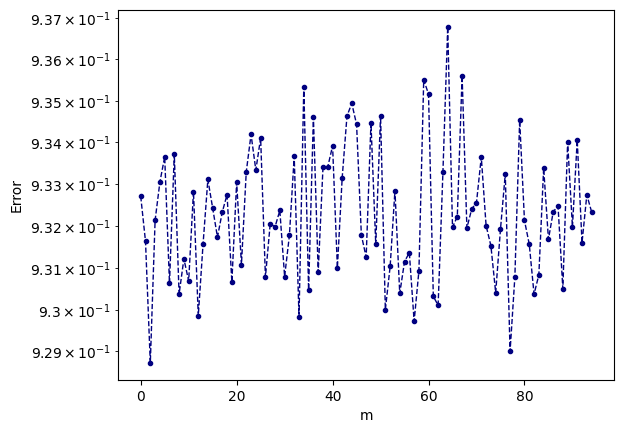

In [72]:
N = 10
A = np.random.rand(N**3, N**3)
b = np.random.rand(N**3)
m = range(5, 100)

err = np.zeros(len(m))
for i in range(len(m)):
    Q, T, _, _ = lanczos_method(A, b, m[i])
    b_m = Q.T @ b
    x_m = la.spsolve(T, b_m[:m[i]])
    x_0 = Q[:, :m[i]] @ x_m[:m[i]]
    err[i] = np.linalg.norm(x - x_0)/np.linalg.norm(x)
    
plt.plot(err)

plt.gca().set_yscale('log')
plt.ylabel('Error')
plt.xlabel('m')
plt.show()

Для вычисления приближенного решения уравнения сведением его к уравнению в пространстве меньшей размерности используется 
[метод Петрова-Галеркина](https://en.wikipedia.org/wiki/Petrov–Galerkin_method).
Суть метода заключается в следующем.
Пусть дано уравнение $Ax=b$.
Зададимся парой подпространств $K$ и $L$ одинаковой размерности.
Будем искать решение только в пространстве $K\ni x$.
Точное решение в общем случае не лежит в пространстве $K$, поэтому мы можем найти только приближенное решение.
В методе Галеркина в качестве критерия оптимальности выступает условие ортогональности невязки пространству $L$:
$$
(b-Ax)\cdot y=0\,\forall y\in L.
$$
Грубо говоря, в методе оператор $A$ сужается до оператора из $K$ в $L$ и ищется решение для суженного оператора,
что требует гораздо меньше времени, чем исходная задача, если размерность $K$ мала.
В заданиях выше мы брали $L=K=K(A,b,m)$, однако другие варианты могут иметь свои преимущества.

## Задания

#### 8. Используйте $K=K(A,b,m)$, $L=A K$ и решите уравнение Пуассона метода Петрова-Галеркина. 
Оцените ошибку получившегося решения.
Получающийся метод имеет название [GMRES](https://en.wikipedia.org/wiki/Generalized_minimal_residual_method).
Убедитесь, что этот подход минимизирует невязку по всем $x\in K$.

#### 9. Оцените время работы алгоритма как функцию от $m$.

Параметр $m$ размерности пространства Крылова в алгоритмах выше никак не оговаривался.
Однако для вычисления решения с заданной точностью нужно выбрать достаточно большое $m$, 
однако при работе с большими $m$ теряются преимущества итерационных методов.
На практике $m$ увеличивают постепенно до достижения требуемой точности. 
Однако повторять все вычисления для каждого нового $m$ слишком дорого.
Одна из самых дорогих операций - это ортогонализация всех векторов базиса.
Объем вычислений можно уменьшить ценой потери точности, если требовать ортогональность только 
небольшого фиксированного числа последних добавленных векторов,
см. подробнее главу 6.4.2 в Саад. 
Если матрица трехдиагональна, то вектора Арнольди связаны рекуррентным соотношением,
связывающим три последовательных вектора.
Это значит, что можно не хранить больше трех векторов и производить операции только с ними,
см. подробности в Саад, глава 6.4.2 и глава 6.5.7. 

## Задание

#### 10. Реализуйте алгоритм DQGMRES (Саад, 6.13). 
Сравните результат с результатом алогритма GMRES при фиксированном $m$.
Постройте график изменения ошибки решения с ростом $m$.

Кроме решения систем уравнений итерационные методы часто используются для приближенного вычисления собственных значений.
Для оценки собственных значений можно использовать [метод Ритца](https://en.wikipedia.org/wiki/Ritz_method)
(см. Голуб 10.1.4).
Самые большие и самые маленькие собственные числа трехдиагональной матрицы хорошо оценивают соответствующие собственные числа всей матрицы $A$,
см. оценки сходимости в Голуб 10.1.5.

## Задание

#### 11. Используйте метод Ланцоша для построения трехдиагональной матрицы сужения оператора $A$ на пространство Крылова $K(A,q,m)$
для некоторого вектора $q$.
Найдите наименьшее собственное значение трехдиагональной матрицы и сравните с наименьшим собственным значением оператора Лапласа.
Изучите, как изменяется ошибка, как функция от размерности $m$ пространства Крылова.

# Литература

1. Yousef Saad. Iterative methods for sparse linear systems. 2nd Edition, 2000.

2. G.H. Golub and C.F. Van Loan. Matrix Computations, 4th Edition, 2012.


